In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [22]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [23]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS', 'DELTA_TEMP', 'CO']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year="ethiopia-2018", bucket=False, shuffle=False, split='test', repeat=1, batch_size=3000).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [45]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [46]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-21 21:50:05.631059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-1.43202887e+01]
 [ 1.33777648e-01]
 [-2.22177434e+00]
 [-1.46560965e+01]
 [-1.51757317e+01]
 [-7.44232416e+00]
 [-1.44429560e+01]
 [ 2.03103181e-02]
 [-1.25261698e+01]
 [ 1.09260358e-01]
 [ 2.26030350e-01]
 [-1.43669119e+01]
 [-1.45068312e+01]
 [-1.40074530e+01]
 [-1.67002189e+00]
 [-1.46670465e+01]
 [ 6.44931674e-01]
 [-1.38933859e+01]
 [-1.40425701e+01]
 [ 2.11022228e-01]
 [-1.49517975e+01]
 [ 1.33777648e-01]
 [-1.48120155e+01]
 [ 2.86574244e-01]
 [ 7.03018680e-02]
 [-1.39577188e+01]
 [ 5.06890655e-01]
 [-1.42557669e+01]
 [-1.14649630e+01]
 [ 1.34891853e-01]
 [-1.44693289e+01]
 [-1.54656811e+01]
 [ 3.19295198e-01]
 [ 5.10886982e-02]
 [-1.47188082e+01]
 [-1.57644854e+01]
 [-1.32380514e+01]
 [-2.68597722e+00]
 [-1.40778294e+01]
 [ 8.12967002e-01]
 [-1.45378561e+01]
 [-1.24485350e+01]
 [-2.82429504e+00]
 [-1.93435585e+00]
 [ 2.75262684e-01]
 [ 1.97769016e-01]
 [-1.46776209e+01]
 [ 1.97769016e-01]
 [-8.98580492e-01]
 [-1.37266855e+01]
 [-1.51706829e+01]
 [-1.43471355e+01]
 [-1.2934144

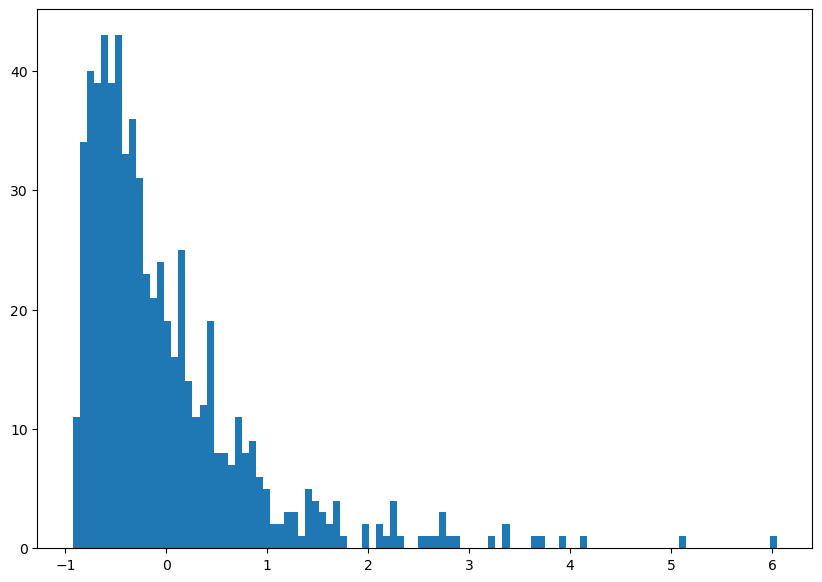

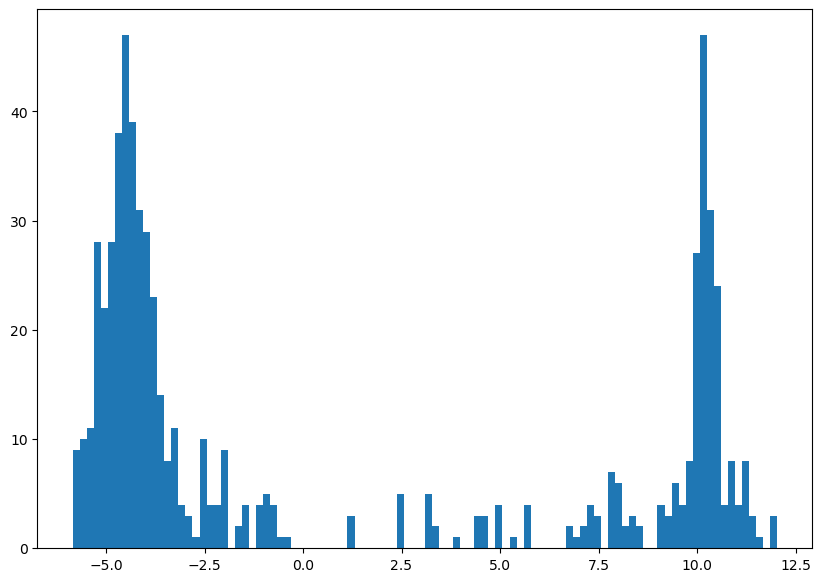

In [47]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)
y_preds = y_preds + 10

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()



r2 = pearsonr(y_true, y_preds)[0]

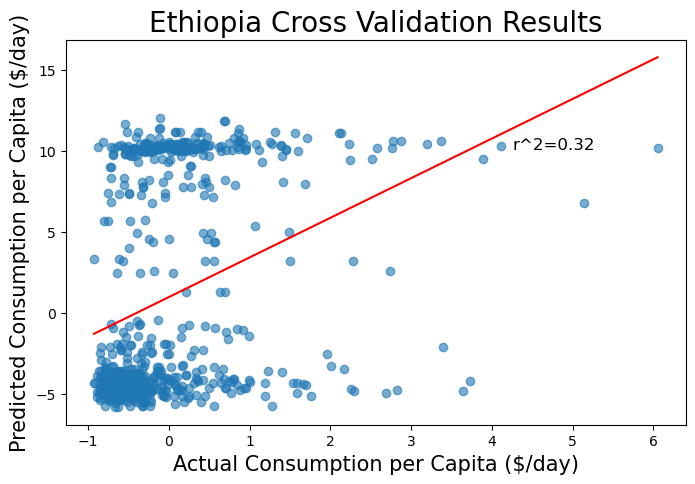

In [48]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([-2, np.max(y_preds)])
plt.show()